In [ ]:
#Main Libraries
import os
import pandas as pd
import numpy as np
import random
import string
import os
import random
import glob

#Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
seed=11
import re

In [ ]:
"""
This function is used to get the general information about dataframe.
Like The number of columns, Unique Values in a colmn, Total Value count, Total Null, Shape, size in a dataframe
"""
def general_info_dataframe(df,name="FULL DATA",column="label"):
  print(f"{name} Number of unique values in column {column} ",df[column].nunique())
  print("-----------------------------------------------------")
  print(f"{name} unique values in column {column} ",df[column].unique())
  print("-----------------------------------------------------")
  print(f"Number of classes of biology words in {name}\n",df[column].value_counts())
  print("-----------------------------------------------------")
  print(f"{name} SHAPE",df.shape)
  print("-----------------------------------------------------")
  print(f"{name} Size",df.size)



In [ ]:
# Load MeDAL dataset for Next Word Prediction
# Load test, validation, and train data from CSV files
medal_test_data = pd.read_csv("C:\\Users\\sg709\\Downloads\\MeDAL_Next_Word_Prediction\\MeDAL_Dataset\\pretrain_subset\\test.csv")
medal_validate_data = pd.read_csv("C:\\Users\\sg709\\Downloads\\MeDAL_Next_Word_Prediction\\MeDAL_Dataset\\pretrain_subset\\valid.csv")
medal_train_data = pd.read_csv("C:\\Users\\sg709\\Downloads\\MeDAL_Next_Word_Prediction\\MeDAL_Dataset\\pretrain_subset\\train.csv")

In [ ]:
# Display the first few rows of the loaded training data from the MeDAL dataset
medal_train_data.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,14145090,velvet antlers vas are commonly used in tradit...,63,transverse aortic constriction
1,1900667,the clinical features of our cases demonstrate...,85,hodgkins lymphoma
2,8625554,ceftobiprole bpr is an investigational cephalo...,90,methicillinsusceptible s aureus
3,8157202,we have taken a basic biologic RPA to elucidat...,26,parathyroid hormonerelated protein
4,6784974,lipoperoxidationderived aldehydes for example ...,157,lipoperoxidation


In [ ]:
medal_validate_data.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,5017844,different electrocardiographic changes have be...,25,transluminal coronary angioplasty
1,8923525,there are limited data regarding cdx expressio...,14,colorectal adenocarcinoma
2,4675370,many healthcare facilities and other notforpro...,109,notforprofit
3,1402383,we have tested the functional compatibility be...,10,human immunodeficiency virus type
4,8577593,we report the case of an monthold infant who w...,15,extracorporeal membrane oxygenation


In [ ]:
medal_test_data.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,2069316,we developed an animal model of chronic allerg...,89,functional residual capacity
1,6967959,pyogenic granulomas represent the aquisition o...,34,pyogenic granuloma
2,3492721,the l immunotype lipopolysaccharide lps of nei...,97,phosphorylethanolamine
3,8388738,inotropic reserve identified by dobutamine or ...,47,stress echocardiography
4,6234238,pyridoxinedependent seizure is a rare autosoma...,57,severe mental retardation


In [ ]:
# Load Biology Words Data
# Load the biology words data from a CSV file
biology_words = pd.read_csv("C:\\Users\\sg709\\Downloads\\MeDAL_Next_Word_Prediction\\Data\\Biology_words_data.csv")

In [ ]:
medal_full_data= pd.concat([medal_train_data, medal_test_data, medal_validate_data], ignore_index=True)
medal_full_data.reset_index(drop=True, inplace=True)

In [ ]:
# Extract Biology Words from DataFrame
# Get the list of biology words from the "Biology_Words" column
biology_words_df_word_list= biology_words["Biology_Words"]

# Convert Words to Lowercase
# Convert all words in the list to lowercase for consistency
biology_words_df_word_list = [word.lower() for word in biology_words_df_word_list]

In [ ]:
# Separate Words with "or"
# Initialize lists to store words with "or" and the new words list

words_which_has_or=[]
new_words_list=[]

# Iterate through each word in the biology words list
for word in biology_words_df_word_list:
  if " or " in word:
     # If the word contains "or", split it and add to both lists
     words_which_has_or.append(word)
     words = word.split("or")
     new_words_list.extend(words)
     # If the word does not contain "or", add it to the new words list

  else:
    new_words_list.append(word)

In [ ]:
# Function to Clean Each Word
def process_word(word):
    # Remove content within brackets and the brackets themselves
    word = re.sub(r'\([^)]*\)', '', word)
    return word.strip()

# Apply the Cleaning Function to Each Word
# Iterate through each word in the new words list and apply the cleaning function
biology_words_df_word_list_cleaned = [process_word(word) for word in new_words_list]

# Display the cleaned list of biology words
print(biology_words_df_word_list_cleaned)

['abiotic component', 'abscission', 'absorption', 'absorption spectrum', 'acclimatization', 'acetyl-coa', 'acoelomate', 'action potential', 'activation energy', 'active site', 'active transport', 'adaptation', 'adaptive radiation', 'adenine', 'adenosine triphosphate', 'adipose tissue', 'aerobic', 'aerobiology', 'agriculture', 'agrobiology', 'alga', 'allopatric speciation', 'amino acid', 'amniote', 'anaerobic', 'analogous structures', 'anatomy', 'animal', 'antibiotic', 'apoptosis', 'arachnology', 'archaea', 'artificial selection', 'asexual reproduction', 'astrobiology', 'autoimmunity', 'autotroph', 'b cell', 'bacteria', 'bacteriophage', 'barr body', 'basal body', 'behavioral ecology', 'bile', 'binary fission', 'binomial nomenclature', 'biocatalysis', 'biochemistry', 'biodiversity', 'bioengineering', 'bioenergetics', 'biogeography', 'bioinformatics', 'biological organization', 'biology', 'biomass', 'biomathematics', 'biome', 'biomechanics', 'biomedical engineering', 'biomedical research'

In [ ]:
len(biology_words_df_word_list_cleaned)

1352

In [ ]:
# Extract MeDAL Labels
# Get the list of labels from the "LABEL" column of the MeDAL full dataset
medal_labels_df_word_list = medal_full_data["LABEL"]

In [ ]:
# Convert Labels to Lowercase
# Convert all labels in the list to lowercase for consistency
medal_labels_df_word_list = [word.lower() for word in medal_labels_df_word_list]

In [ ]:
# Calculate and Display Count of Lowercase MeDAL Labels
len(medal_labels_df_word_list)

5000000

In [ ]:
# Convert MeDAL Labels Column to Lowercase
# Convert all labels in the 'LABEL' column of the MeDAL full dataset to lowercase
medal_full_data['LABEL'] = medal_full_data['LABEL'].str.lower()

In [ ]:
# Remove Parentheses and Digits from MeDAL Labels
# Remove content within parentheses and any digits from the 'LABEL' column of the MeDAL full dataset
medal_full_data['LABEL'] = medal_full_data['LABEL'].str.replace(r'\([^)]*\)|\d+', '', regex=True)


In [ ]:
medal_full_data.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,14145090,velvet antlers vas are commonly used in tradit...,63,transverse aortic constriction
1,1900667,the clinical features of our cases demonstrate...,85,hodgkins lymphoma
2,8625554,ceftobiprole bpr is an investigational cephalo...,90,methicillinsusceptible s aureus
3,8157202,we have taken a basic biologic RPA to elucidat...,26,parathyroid hormonerelated protein
4,6784974,lipoperoxidationderived aldehydes for example ...,157,lipoperoxidation


In [ ]:
# Filter MeDAL Data Based on Cleaned Biology Words List
# Create a filtered dataset containing rows with labels present in the cleaned biology words list
medal_filtered_data = medal_full_data[medal_full_data['LABEL'].str.lower().isin(biology_words_df_word_list_cleaned)]

# Reset the index of the filtered data
medal_filtered_data.reset_index(drop=True, inplace=True)

In [ ]:
medal_filtered_data.tail()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
33353,10938635,riemerella anatipestifer ra is one of the most...,197,homologous
33354,6426599,the parotid and mandibular glands of the cotto...,17,parotid gland
33355,10298909,proteolysis of the PG aggrecan is a feature of...,64,urinary bladder
33356,737200,the authors tested the clinical tau of the mal...,145,ligament
33357,84084,in order to evaluate the control of the CR of ...,8,circadian rhythm


In [ ]:
# Further Filter MeDAL Data Based on Text Matching
# Create a more refined filtered dataset by keeping rows where the label is present in the text
medal_filtered_data = medal_filtered_data[medal_filtered_data.apply(lambda row: row['LABEL'] in row['TEXT'], axis=1)]

# Reset the index of the refined filtered data
medal_filtered_data.reset_index(drop=True, inplace=True)


In [ ]:
medal_filtered_data.tail()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
12027,1051246,the reparative process following left ventricu...,82,granulation tissue
12028,3776040,brains from neonatal autopsies from the seyche...,262,brain
12029,3598779,ocular adnexal lymphoproliferative lesions con...,17,hyperplasia
12030,9325165,mr techniques have been reported as an alterna...,34,parotid gland
12031,737200,the authors tested the clinical tau of the mal...,145,ligament


In [ ]:
# Save Filtered MeDAL Data to CSV
# Save the refined filtered MeDAL dataset to a CSV file with specified file path
medal_filtered_data.to_csv('C:\\Users\\sg709\\Downloads\\Next_Word_Prediction_code\\medal_filtered_data.csv', index=False)

In [ ]:
# Read Manually Filtered MeDAL Data from CSV
# Load the manually filtered MeDAL dataset from a CSV file into a DataFrame
medal_filtered_data = pd.read_csv("/content/drive/MyDrive/Final_Code_Backup_16th_August/Next_Word_Prediction_code/medal_filtered_data.csv")


In [ ]:
medal_filtered_data.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,859112,in this T0 S1 heavy chain from sea urchin plut...,99,myosin
1,6505584,a yearold woman with a tentative diagnosis of ...,19,lymph
2,2876679,this T0 was undertaken to investigate the effe...,117,cholinergic
3,7271743,the objectives of the present T0 were to inves...,111,brain
4,11043287,this T0 investigated whether perinatal SE to d...,48,spleen


In [ ]:
import pandas as pd

# Function to Truncate Text
# Define a function to truncate text to a certain number of words
def truncate_text(text, max_words):
    words = text.split()
    truncated_words = ' '.join(words[:max_words])
    return truncated_words

# Apply Truncation Function to "TEXT" Column
# Apply the truncation function to the "TEXT" column using a lambda function
max_words_per_row = 15
medal_filtered_data["TEXT"] = medal_filtered_data["TEXT"].apply(lambda x: truncate_text(x, max_words_per_row))

# Display the Updated DataFrame
print(medal_filtered_data)


     ABSTRACT_ID                                               TEXT  LOCATION  \
0         859112  in this T0 S1 heavy chain from sea urchin plut...        99   
1        6505584  a yearold woman with a tentative diagnosis of ...        19   
2        2876679  this T0 was undertaken to investigate the effe...       117   
3        7271743  the objectives of the present T0 were to inves...       111   
4       11043287  this T0 investigated whether perinatal SE to d...        48   
..           ...                                                ...       ...   
243     14871319  the aims of this T0 were to evaluate the BA of...         9   
244     14080589  this T0 examined eight hundred ninety six mari...       134   
245      9746756  the aim of the present T0 was to investigate t...        77   
246     13084099  this T0 aimed to determine final VG length and...        75   
247     12901822  the objective of this study is to analyze the ...        59   

                  LABEL  
0

In [ ]:
medal_filtered_data["TEXT"][0]

'in this T0 S1 heavy chain from sea urchin pluteus larvae was characterized by analysis'

In [ ]:
# Extract "TEXT" Column into List
# Extract the contents of the "TEXT" column from the DataFrame into a list
medal_text = medal_filtered_data['TEXT'].to_list()

In [ ]:
len(medal_text)

248

In [ ]:
import json

# Save Medal Text List as JSON
# Specify the file path where the JSON file will be saved
file_path = 'medal_text_248.json'

# Open the file in write mode and save the contents of the medal_text list as a JSON object
with open(file_path, 'w') as file:
    json.dump(medal_text, file)

In [ ]:
# Read JSON File and Load Data
# Open the JSON file in read mode and load the data into the medal_text list
with open(file_path, 'r') as file:
    medal_text = json.load(file)

In [ ]:
medal_text[0]

'in this T0 S1 heavy chain from sea urchin pluteus larvae was characterized by analysis'

In [ ]:
# Initialize Text Tokenizer
# Create an instance of the text tokenizer from TensorFlow Keras
tokenizer = tf.keras.preprocessing.text.Tokenizer()


In [ ]:
# Fit Tokenizer on Medal Text Data
# Fit the initialized tokenizer on the medal_text data to build the vocabulary
tokenizer.fit_on_texts(medal_text)


In [ ]:
# Convert Text to Sequences of Tokens
# Convert the medal_text data to sequences of tokens using the fitted tokenizer
seq = tokenizer.texts_to_sequences(medal_text)


In [ ]:
seq

[[7, 5, 3, 313, 144, 85, 31, 314, 315, 316, 317, 6, 318, 38, 86],
 [9, 14, 35, 10, 9, 319, 61, 2, 320, 44, 145, 321, 10, 146, 322],
 [5, 3, 6, 323, 4, 19, 1, 22, 2, 324, 325, 8, 326, 15, 1],
 [1, 55, 2, 1, 11, 3, 26, 4, 19, 1, 327, 87, 2, 62, 328],
 [5, 3, 21, 27, 329, 147, 4, 330, 331, 332, 333, 334, 17, 15, 148],
 [5, 3, 21, 1, 335, 2, 336, 337, 7, 338, 339, 340, 10, 45, 341],
 [5, 3, 6, 28, 4, 88, 1, 149, 39, 342, 8, 343, 344, 150, 2],
 [7, 5, 3, 151, 345, 2, 346, 152, 26, 347, 7, 89, 348, 349, 10],
 [7, 1, 11, 3, 23, 46, 1, 153, 90, 2, 350, 351, 352, 15, 154],
 [1, 12, 2, 1, 11, 3, 6, 4, 63, 1, 353, 32, 1, 155, 156],
 [1, 12, 2, 1, 3, 6, 4, 16, 27, 1, 354, 7, 91, 355, 356],
 [1, 13, 2, 5, 357, 29, 4, 16, 92, 358, 359, 360, 8, 361, 7],
 [5, 3, 6, 40, 4, 16, 27, 362, 93, 157, 158, 363, 364, 159, 365],
 [1, 12, 2, 5, 3, 6, 4, 47, 1, 366, 32, 367, 160, 8, 368],
 [9, 14, 35, 36, 10, 9, 369, 370, 371, 2, 1, 161, 372, 10, 373],
 [1, 13, 2, 5, 18, 15, 374, 8, 375, 376, 377, 6, 4, 20, 1],
 

In [ ]:
# Retrieve Word-to-Index Mapping
# Get the word-to-index mapping from the fitted tokenizer
tokenizer.word_index

{'the': 1,
 'of': 2,
 't0': 3,
 'to': 4,
 'this': 5,
 'was': 6,
 'in': 7,
 'and': 8,
 'a': 9,
 'with': 10,
 'present': 11,
 'aim': 12,
 'objective': 13,
 'yearold': 14,
 'on': 15,
 'determine': 16,
 'effects': 17,
 'study': 18,
 'investigate': 19,
 'evaluate': 20,
 'investigated': 21,
 'effect': 22,
 'we': 23,
 'examined': 24,
 'for': 25,
 'were': 26,
 'whether': 27,
 'designed': 28,
 'is': 29,
 'man': 30,
 'from': 31,
 'between': 32,
 'an': 33,
 'admitted': 34,
 'woman': 35,
 'presented': 36,
 'aimed': 37,
 'by': 38,
 'that': 39,
 'conducted': 40,
 'used': 41,
 'changes': 42,
 'assess': 43,
 'had': 44,
 'different': 45,
 'evaluated': 46,
 'compare': 47,
 'our': 48,
 'hospital': 49,
 'female': 50,
 'ph': 51,
 'male': 52,
 'role': 53,
 'as': 54,
 'objectives': 55,
 'type': 56,
 'expression': 57,
 'mass': 58,
 'patients': 59,
 'aims': 60,
 'diagnosis': 61,
 'bb': 62,
 'examine': 63,
 'analyze': 64,
 'associated': 65,
 'presents': 66,
 'development': 67,
 'dose': 68,
 'mm': 69,
 'relation

In [ ]:
# Prepare Training Data: Creating Sequences of Input Tokens and Target Tokens
X = []  # List to store input sequences
y = []  # List to store target tokens
total_words_dropped = 0  # Variable to count total single words dropped

# Iterate through each sequence in seq
for l in seq:
    if len(l) > 1:  # Check if the sequence has more than one token
        for index in range(1, len(l)):  # Create sequences of increasing lengths
            X.append(l[:index])  # Input sequence
            y.append(l[index])    # Target token
    else:
        total_words_dropped += 1  # Count single words dropped

# Print the total number of single words dropped
print("Total Single Words Dropped are:", total_words_dropped)


Total Single Words Dropped are: 0


In [ ]:
X[:10]

[[7],
 [7, 5],
 [7, 5, 3],
 [7, 5, 3, 313],
 [7, 5, 3, 313, 144],
 [7, 5, 3, 313, 144, 85],
 [7, 5, 3, 313, 144, 85, 31],
 [7, 5, 3, 313, 144, 85, 31, 314],
 [7, 5, 3, 313, 144, 85, 31, 314, 315],
 [7, 5, 3, 313, 144, 85, 31, 314, 315, 316]]

In [ ]:
y[:10]

[5, 3, 313, 144, 85, 31, 314, 315, 316, 317]

In [ ]:
# Perform Padding on Input Sequences
# Pad the input sequences X using TensorFlow Keras padding function
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [ ]:
X.shape

(3472, 14)

In [ ]:
# Convert Target Tokens to One-Hot Encoded Categorical Format
# Convert the target tokens y into one-hot encoded categorical format using TensorFlow Keras
y = tf.keras.utils.to_categorical(y)


In [ ]:
# Calculate Vocabulary Size
# Calculate the vocabulary size by adding 1 to the length of the word-to-index mapping
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1181

In [ ]:
# Split Data into Training and Validation Sets
# Split the input sequences (X) and one-hot encoded target tokens (y) into training and validation sets
# with a test size of 5% and a fixed random state for reproducibility
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)


##Model 1 LSTM relu

In [ ]:
# Define Neural Network Model (Model 1)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 14),         # Embedding layer for token representation
    tf.keras.layers.LSTM(100, return_sequences=True),  # First LSTM layer with return sequences
    tf.keras.layers.LSTM(100),                         # Second LSTM layer
    tf.keras.layers.Dense(100, activation='relu'),     # Dense layer with ReLU activation
    tf.keras.layers.Dense(vocab_size, activation='softmax'),  # Output layer with softmax activation
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 14)          16534     
                                                                 
 lstm (LSTM)                 (None, None, 100)         46000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 1181)              119281    
                                                                 
Total params: 272,315
Trainable params: 272,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile Neural Network Model (Model 1)
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),  # Adam optimizer with specified learning rate
    loss='categorical_crossentropy',  # Categorical cross-entropy loss function
    metrics=['accuracy']  # Evaluation metric: accuracy
)

Epoch 1/100
104/104 [==============================] - 3s 14ms/step - loss: 6.0838 - accuracy: 0.0743 - val_loss: 5.9362 - val_accuracy: 0.0690
Epoch 2/100
104/104 [==============================] - 1s 10ms/step - loss: 5.4341 - accuracy: 0.0825 - val_loss: 5.5710 - val_accuracy: 0.0690
Epoch 3/100
104/104 [==============================] - 1s 10ms/step - loss: 5.0884 - accuracy: 0.1152 - val_loss: 5.4786 - val_accuracy: 0.1782
Epoch 4/100
104/104 [==============================] - 1s 11ms/step - loss: 4.6709 - accuracy: 0.2074 - val_loss: 5.6001 - val_accuracy: 0.2069
Epoch 5/100
104/104 [==============================] - 1s 10ms/step - loss: 4.4038 - accuracy: 0.2323 - val_loss: 5.4252 - val_accuracy: 0.2414
Epoch 6/100
104/104 [==============================] - 1s 11ms/step - loss: 4.1395 - accuracy: 0.2726 - val_loss: 5.3635 - val_accuracy: 0.2989
Epoch 7/100
104/104 [==============================] - 1s 10ms/step - loss: 3.8771 - accuracy: 0.3023 - val_loss: 5.6518 - val_accuracy:

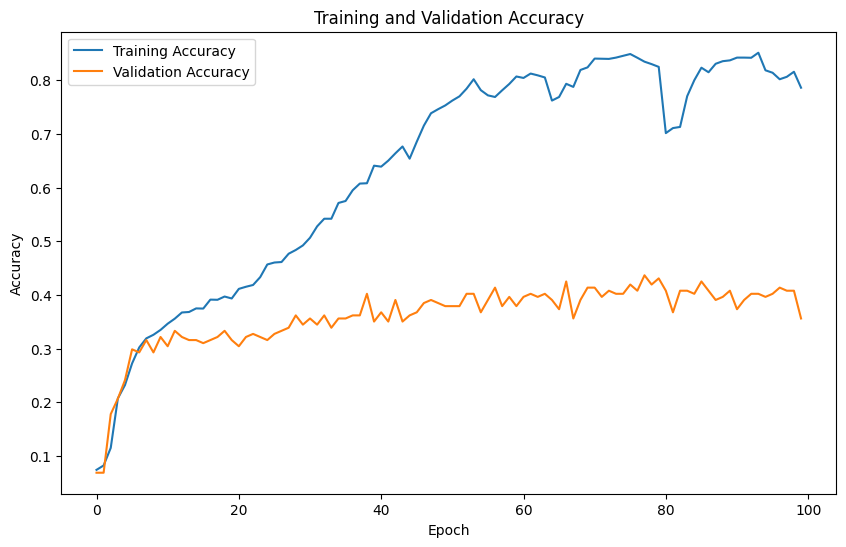

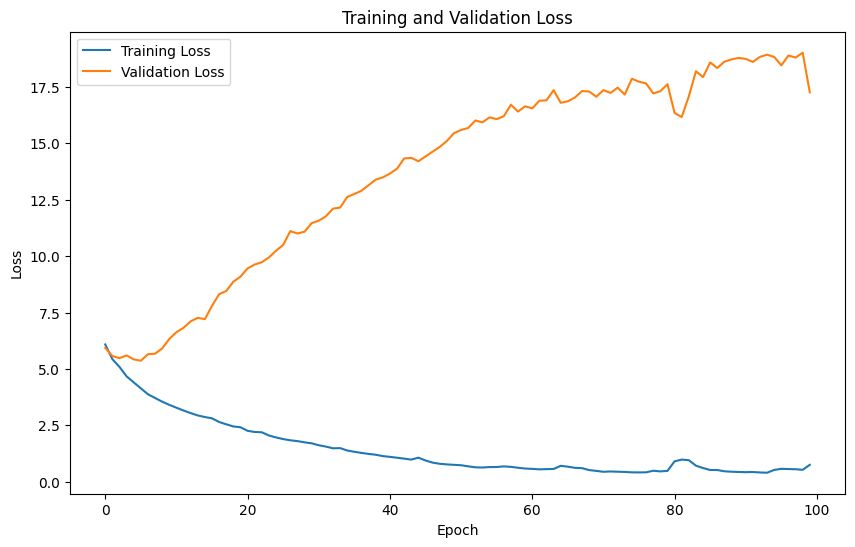

In [ ]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [ ]:
# Define Prediction Function (Model 1)
def make_prediction_1(text, n_words):
    for i in range(n_words):
        # Tokenize and pad the input text
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)

        # Make predictions using the model
        predictions = model_1.predict(text_padded)

        # Get top predicted words and their probabilities
        top_indices = np.argsort(predictions[0])[::-1][:5]
        top_words = [vocab_array[index - 1] for index in top_indices]
        top_probabilities = [predictions[0][index] for index in top_indices]

        # Print predicted words and their probabilities
        for word, prob in zip(top_words, top_probabilities):
            print(f"Predicted word: {word}, Probability: {prob:.4f}")

        # Get the predicted word index
        prediction_index = np.argmax(predictions, axis=-1)
        prediction = str(vocab_array[prediction_index - 1])

        # Append the predicted word to the text
        text += " " + prediction
    return text


In [ ]:
# Generate Predictions for Different Initial Texts
print(make_prediction_1("a yearold", 1))  # Generate predictions for the initial text "a yearold"

print(make_prediction_1("T0 circulating", 1))  # Generate predictions for the initial text "T0 circulating"

print(make_prediction_1("the aim of the T0 was to", 1))  # Generate predictions for the initial text "the aim of the T0 was to"

print(make_prediction_1("this T0 describes", 1))  # Generate predictions for the initial text "this T0 describes"


1/1 [==============================] - 0s 330ms/step
Predicted word: was, Probability: 0.7800
Predicted word: investigates, Probability: 0.0319
Predicted word: yearold, Probability: 0.0245
Predicted word: examined, Probability: 0.0211
Predicted word: presents, Probability: 0.0195
yearold ['was']
1/1 [==============================] - 0s 13ms/step
Predicted word: girl, Probability: 0.8323
Predicted word: predictions, Probability: 0.0516
Predicted word: female, Probability: 0.0452
Predicted word: western, Probability: 0.0173
Predicted word: relationship, Probability: 0.0121
T0 circulating ['girl']
1/1 [==============================] - 0s 12ms/step
Predicted word: investigate, Probability: 0.6475
Predicted word: evaluate, Probability: 0.1850
Predicted word: determine, Probability: 0.0720
Predicted word: highlight, Probability: 0.0694
Predicted word: compare, Probability: 0.0065
the aim of the T0 was to ['investigate']
1/1 [==============================] - 0s 12ms/step
Predicted word: th

##Model 2 LSTM tanh

In [ ]:
# Define Neural Network Model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 14),  # Embedding layer with vocab_size as input dimension and 14 as output dimension
    tf.keras.layers.LSTM(100, return_sequences=True),  # LSTM layer with 100 units and return sequences
    tf.keras.layers.LSTM(100),  # LSTM layer with 100 units
    tf.keras.layers.Dense(100, activation='tanh'),  # Dense layer with 100 units and tanh activation function
    tf.keras.layers.Dense(vocab_size, activation='softmax'),  # Dense layer with vocab_size units and softmax activation function
])


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 14)          16534     
                                                                 
 lstm_2 (LSTM)               (None, None, 100)         46000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1181)              119281    
                                                                 
Total params: 272,315
Trainable params: 272,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile Model 2
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),  # Adam optimizer with learning rate of 0.004
    loss='categorical_crossentropy',  # Categorical cross-entropy loss function
    metrics=['accuracy']  # List of metrics to monitor during training (accuracy in this case)
)


Epoch 1/100
104/104 [==============================] - 3s 14ms/step - loss: 6.4504 - accuracy: 0.0679 - val_loss: 6.2797 - val_accuracy: 0.0690
Epoch 2/100
104/104 [==============================] - 1s 11ms/step - loss: 6.0600 - accuracy: 0.0697 - val_loss: 6.6504 - val_accuracy: 0.0690
Epoch 3/100
104/104 [==============================] - 1s 10ms/step - loss: 6.0380 - accuracy: 0.0728 - val_loss: 6.8099 - val_accuracy: 0.0977
Epoch 4/100
104/104 [==============================] - 1s 10ms/step - loss: 6.0636 - accuracy: 0.0740 - val_loss: 6.7867 - val_accuracy: 0.0977
Epoch 5/100
104/104 [==============================] - 1s 10ms/step - loss: 6.0184 - accuracy: 0.0761 - val_loss: 6.7377 - val_accuracy: 0.0690
Epoch 6/100
104/104 [==============================] - 1s 10ms/step - loss: 6.0229 - accuracy: 0.0743 - val_loss: 6.7682 - val_accuracy: 0.0977
Epoch 7/100
104/104 [==============================] - 1s 11ms/step - loss: 5.9959 - accuracy: 0.0734 - val_loss: 6.3385 - val_accuracy:

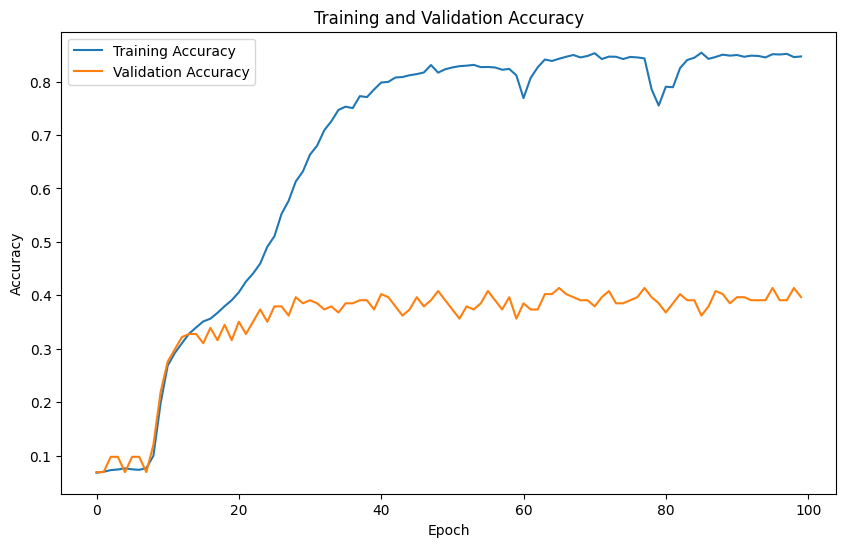

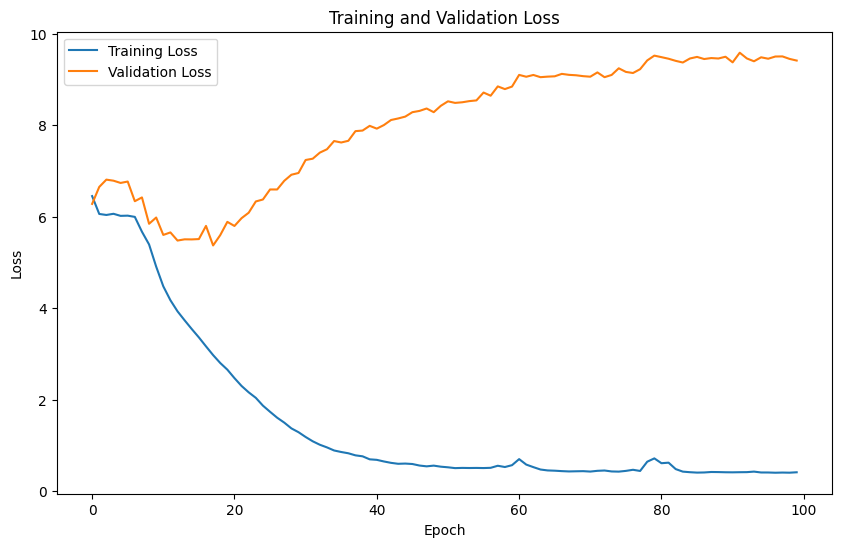

In [ ]:
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Function to Generate Predictions using Model 2
def make_prediction_2(text, n_words):
    for i in range(n_words):
        # Tokenize the input text and pad sequences to a fixed length
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)

        # Make predictions using Model 2
        predictions = model_2.predict(text_padded)

        # Get top predicted words and their probabilities
        top_indices = np.argsort(predictions[0])[::-1][:5]  # Get indices of top 5 predictions
        top_words = [vocab_array[index - 1] for index in top_indices]  # Convert indices to words
        top_probabilities = [predictions[0][index] for index in top_indices]  # Get probabilities

        # Print the top predicted words and their probabilities
        for word, prob in zip(top_words, top_probabilities):
            print(f"Predicted word: {word}, Probability: {prob:.4f}")

        # Get the predicted word based on the highest probability
        prediction_index = np.argmax(predictions, axis=-1)
        prediction = str(vocab_array[prediction_index - 1])

        # Append the predicted word to the input text for the next iteration
        text += " " + prediction
    return text


In [ ]:
# Generate predictions for the input text "a yearold" with 1 additional word
print(make_prediction_2("a yearold", 1))

# Generate predictions for the input text "T0 circulating" with 1 additional word
print(make_prediction_2("T0 circulating", 1))

# Generate predictions for the input text "the aim of the T0 was to" with 1 additional word
print(make_prediction_2("the aim of the T0 was to", 1))

# Generate predictions for the input text "this T0 describes" with 1 additional word
print(make_prediction_2("this T0 describes", 1))


1/1 [==============================] - 0s 304ms/step
Predicted word: man, Probability: 0.3676
Predicted word: woman, Probability: 0.2294
Predicted word: male, Probability: 0.1087
Predicted word: female, Probability: 0.0731
Predicted word: boy, Probability: 0.0515
a yearold ['man']
1/1 [==============================] - 0s 11ms/step
Predicted word: yearold, Probability: 0.9957
Predicted word: yrold, Probability: 0.0016
Predicted word: stallion, Probability: 0.0005
Predicted word: hundred, Probability: 0.0003
Predicted word: female, Probability: 0.0002
T0 circulating ['yearold']
1/1 [==============================] - 0s 12ms/step
Predicted word: investigate, Probability: 0.7823
Predicted word: evaluate, Probability: 0.1436
Predicted word: determine, Probability: 0.0581
Predicted word: establish, Probability: 0.0047
Predicted word: compare, Probability: 0.0029
the aim of the T0 was to ['investigate']
1/1 [==============================] - 0s 12ms/step
Predicted word: the, Probability: 0.9

##Model 3 BI LSTM relu

In [ ]:
# Define a new sequential model named model_3
model_3 = tf.keras.Sequential([
    # Add an embedding layer with input vocabulary size and embedding dimension of 14
    tf.keras.layers.Embedding(vocab_size, 14),

    # Add a Bidirectional LSTM layer with 100 units and return sequences for the next LSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),

    # Add another Bidirectional LSTM layer with 100 units
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),

    # Add a dense layer with 100 units and hyperbolic tangent (tanh) activation function
    tf.keras.layers.Dense(100, activation='tanh'),

    # Add a dense output layer with vocabulary size units and softmax activation function
    tf.keras.layers.Dense(vocab_size, activation='softmax'),
])


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 14)          16534     
                                                                 
 lstm_4 (LSTM)               (None, None, 100)         46000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1181)              119281    
                                                                 
Total params: 272,315
Trainable params: 272,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),  # Using Adam optimizer with learning rate 0.004
    loss='categorical_crossentropy',  # Using categorical cross-entropy as the loss function
    metrics=['accuracy']  # Monitoring accuracy as a metric
)

Epoch 1/100
104/104 [==============================] - 3s 15ms/step - loss: 6.3729 - accuracy: 0.0779 - val_loss: 6.2018 - val_accuracy: 0.0977
Epoch 2/100
104/104 [==============================] - 1s 11ms/step - loss: 5.9163 - accuracy: 0.0722 - val_loss: 6.2018 - val_accuracy: 0.0402
Epoch 3/100
104/104 [==============================] - 1s 11ms/step - loss: 5.7148 - accuracy: 0.0731 - val_loss: 6.1577 - val_accuracy: 0.0690
Epoch 4/100
104/104 [==============================] - 1s 10ms/step - loss: 5.6239 - accuracy: 0.0731 - val_loss: 6.1528 - val_accuracy: 0.0977
Epoch 5/100
104/104 [==============================] - 1s 11ms/step - loss: 5.2267 - accuracy: 0.1249 - val_loss: 5.7691 - val_accuracy: 0.1494
Epoch 6/100
104/104 [==============================] - 1s 11ms/step - loss: 4.7741 - accuracy: 0.2056 - val_loss: 5.8641 - val_accuracy: 0.2126
Epoch 7/100
104/104 [==============================] - 1s 11ms/step - loss: 4.4835 - accuracy: 0.2486 - val_loss: 5.5122 - val_accuracy:

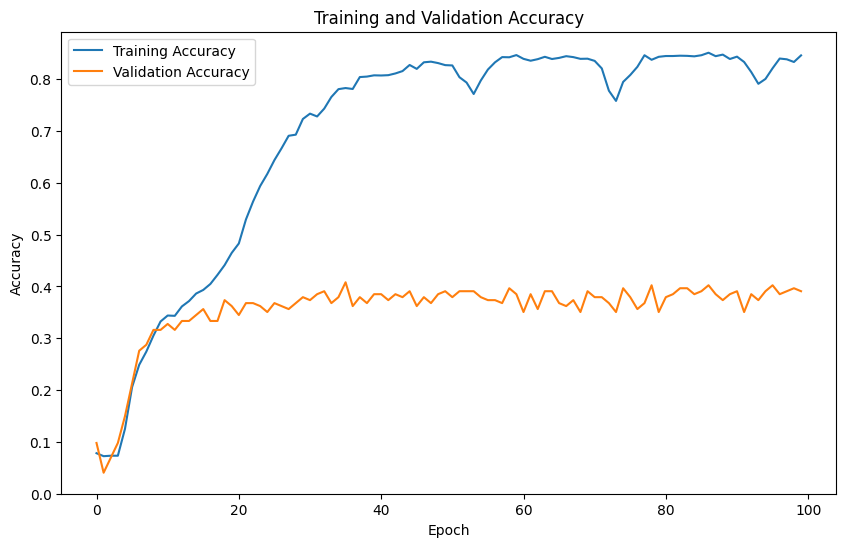

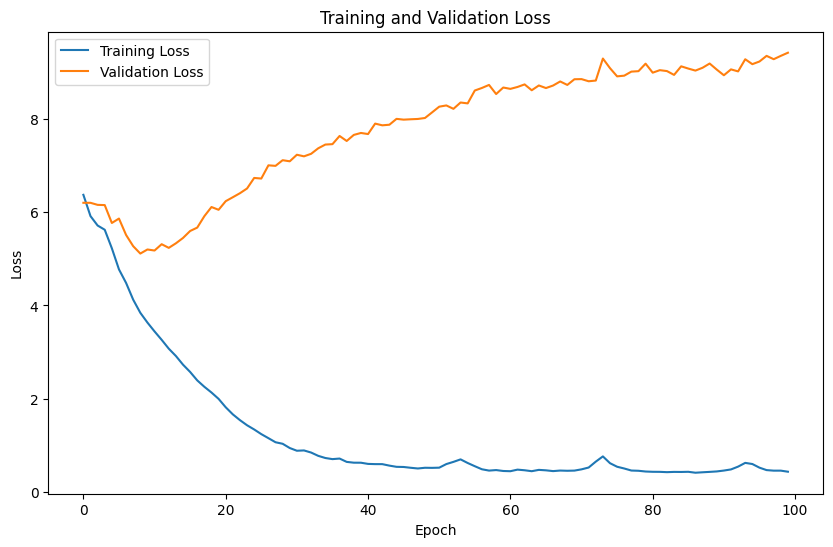

In [ ]:
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Import necessary packages
import numpy as np
import tensorflow as tf

# Define function for generating word predictions using model_3
def make_prediction_3(text, n_words):
    # Loop over the number of words to predict
    for i in range(n_words):
        # Tokenize the given text using the tokenizer
        text_tokenize = tokenizer.texts_to_sequences([text])
        # Pad the tokenized text to match the input shape of the model
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        # Use model_3 to predict probabilities of next words
        predictions = model_3.predict(text_padded)

        # Get indices of top 5 predictions with highest probabilities
        top_indices = np.argsort(predictions[0])[::-1][:5]
        # Convert indices to actual words using vocab_array
        top_words = [vocab_array[index - 1] for index in top_indices]
        # Get probabilities of the top predicted words
        top_probabilities = [predictions[0][index] for index in top_indices]

        # Print predicted words and their probabilities
        for word, prob in zip(top_words, top_probabilities):
            print(f"Predicted word: {word}, Probability: {prob:.4f}")

        # Get index of predicted word with highest probability
        prediction_index = np.argmax(predictions, axis=-1)
        # Get the actual predicted word using vocab_array
        prediction = str(vocab_array[prediction_index - 1])

        # Append the predicted word to the text
        text += " " + prediction

    # Return the generated sequence of words
    return text


In [ ]:
# Make predictions using model_3 for the given input text and generate 1 word
print(make_prediction_3("a yearold", 1))

# Make predictions using model_3 for the given input text and generate 1 word
print(make_prediction_3("T0 circulating", 1))

# Make predictions using model_3 for the given input text and generate 1 word
print(make_prediction_3("the aim of the T0 was to", 1))

# Make predictions using model_3 for the given input text and generate 1 word
print(make_prediction_3("this T0 describes", 1))


1/1 [==============================] - 0s 308ms/step
Predicted word: woman, Probability: 0.2638
Predicted word: man, Probability: 0.2500
Predicted word: boy, Probability: 0.1461
Predicted word: male, Probability: 0.0659
Predicted word: female, Probability: 0.0629
a yearold ['woman']
1/1 [==============================] - 0s 13ms/step
Predicted word: virilization, Probability: 0.4380
Predicted word: repeat, Probability: 0.3441
Predicted word: ort, Probability: 0.0774
Predicted word: a, Probability: 0.0538
Predicted word: tissue, Probability: 0.0239
T0 circulating ['virilization']
1/1 [==============================] - 0s 12ms/step
Predicted word: investigate, Probability: 0.8744
Predicted word: evaluate, Probability: 0.0577
Predicted word: determine, Probability: 0.0576
Predicted word: analyze, Probability: 0.0032
Predicted word: establish, Probability: 0.0016
the aim of the T0 was to ['investigate']
1/1 [==============================] - 0s 12ms/step
Predicted word: the, Probability: 0

##Model 4 BI LSTM tanh

In [ ]:
# Define a new sequential model named model_4
model_4 = tf.keras.Sequential([
    # Add an embedding layer with input vocabulary size and embedding dimension of 14
    tf.keras.layers.Embedding(vocab_size, 14),

    # Add a Bidirectional LSTM layer with 100 units and return sequences for the next LSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),

    # Add another Bidirectional LSTM layer with 100 units
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),

    # Add a dense layer with 100 units and hyperbolic tangent (relu) activation function
    tf.keras.layers.Dense(100, activation='relu'),

    # Add a dense output layer with vocabulary size units and softmax activation function
    tf.keras.layers.Dense(vocab_size, activation='softmax'),
])



In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 14)          16534     
                                                                 
 lstm_6 (LSTM)               (None, None, 100)         46000     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1181)              119281    
                                                                 
Total params: 272,315
Trainable params: 272,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model_4 with specific optimizer, loss function, and metrics
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),  # Use the Adam optimizer with a specific learning rate
    loss='categorical_crossentropy',  # Use categorical cross-entropy as the loss function
    metrics=['accuracy']  # Calculate accuracy as a metric
)


Epoch 1/100
104/104 [==============================] - 3s 14ms/step - loss: 6.3263 - accuracy: 0.0749 - val_loss: 6.1843 - val_accuracy: 0.0690
Epoch 2/100
104/104 [==============================] - 1s 10ms/step - loss: 5.7801 - accuracy: 0.0825 - val_loss: 6.0200 - val_accuracy: 0.0977
Epoch 3/100
104/104 [==============================] - 1s 10ms/step - loss: 5.5178 - accuracy: 0.0870 - val_loss: 5.9085 - val_accuracy: 0.0920
Epoch 4/100
104/104 [==============================] - 1s 10ms/step - loss: 5.0306 - accuracy: 0.1689 - val_loss: 5.7929 - val_accuracy: 0.2011
Epoch 5/100
104/104 [==============================] - 1s 10ms/step - loss: 4.6040 - accuracy: 0.2474 - val_loss: 5.4295 - val_accuracy: 0.2529
Epoch 6/100
104/104 [==============================] - 1s 10ms/step - loss: 4.2721 - accuracy: 0.2671 - val_loss: 5.0791 - val_accuracy: 0.2874
Epoch 7/100
104/104 [==============================] - 1s 10ms/step - loss: 3.9928 - accuracy: 0.2956 - val_loss: 5.1171 - val_accuracy:

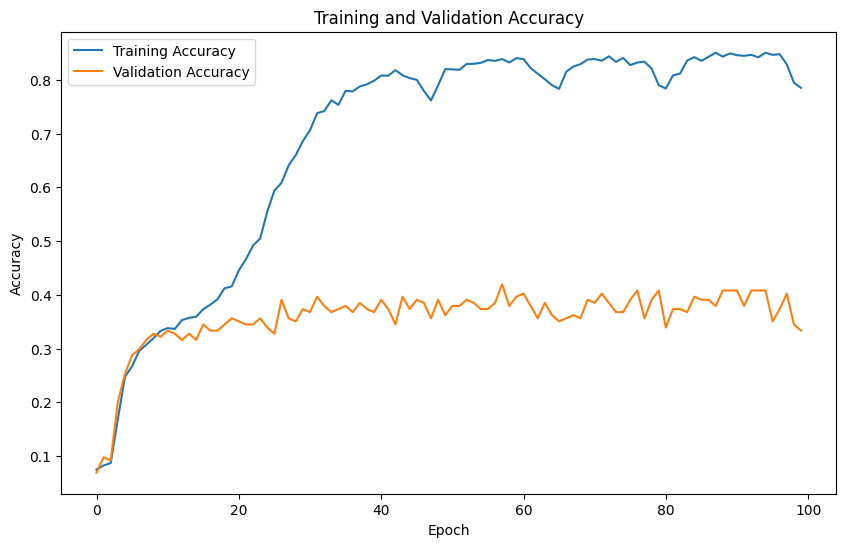

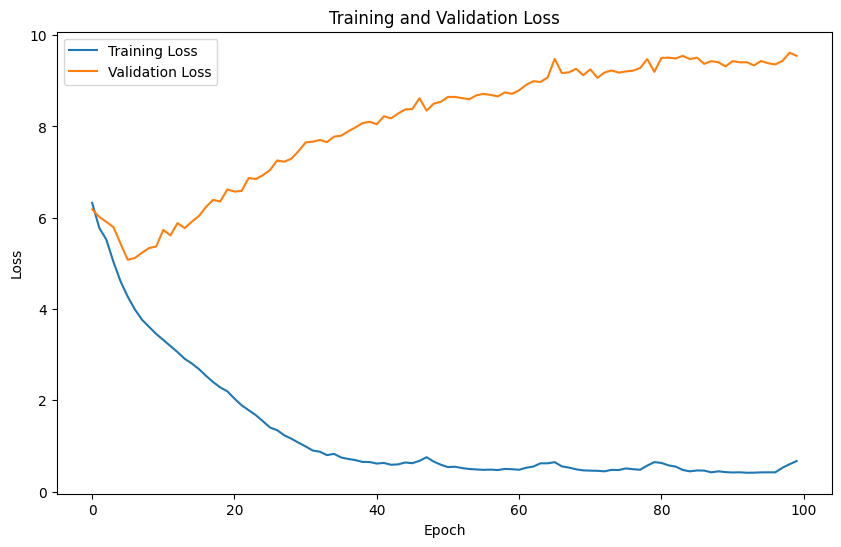

In [ ]:
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Define a function to generate predictions using model_4
def make_prediction_4(text, n_words):
    for i in range(n_words):
        # Convert input text to tokenized sequences
        text_tokenize = tokenizer.texts_to_sequences([text])

        # Pad the tokenized sequence to match the desired input shape
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)

        # Generate predictions using model_4
        predictions = model_4.predict(text_padded)

        # Get indices of the top 5 predictions
        top_indices = np.argsort(predictions[0])[::-1][:5]

        # Convert indices to words using the vocab_array
        top_words = [vocab_array[index - 1] for index in top_indices]

        # Get the probabilities corresponding to the top predictions
        top_probabilities = [predictions[0][index] for index in top_indices]

        # Print the top predicted words and their probabilities
        for word, prob in zip(top_words, top_probabilities):
            print(f"Predicted word: {word}, Probability: {prob:.4f}")

        # Get the index of the prediction with the highest probability
        prediction_index = np.argmax(predictions, axis=-1)

        # Convert the prediction index to the corresponding word
        prediction = str(vocab_array[prediction_index - 1])

        # Append the predicted word to the input text
        text += " " + prediction

    # Return the updated text
    return text


In [ ]:
# Make predictions using model_4 for the given input text and generate 1 word
print(make_prediction_4("a yearold", 1))

# Make predictions using model_4 for the given input text and generate 1 word
print(make_prediction_4("T0 circulating", 1))

# Make predictions using model_4 for the given input text and generate 1 word
print(make_prediction_4("the aim of the T0 was to", 1))

# Make predictions using model_4 for the given input text and generate 1 word
print(make_prediction_4("this T0 describes", 1))

1/1 [==============================] - 0s 319ms/step
Predicted word: man, Probability: 0.3952
Predicted word: male, Probability: 0.1828
Predicted word: woman, Probability: 0.1662
Predicted word: female, Probability: 0.0638
Predicted word: caucasian, Probability: 0.0548
a yearold ['man']
1/1 [==============================] - 0s 12ms/step
Predicted word: germinationinduced, Probability: 0.9560
Predicted word: verification, Probability: 0.0251
Predicted word: predictions, Probability: 0.0076
Predicted word: glycoproteins, Probability: 0.0033
Predicted word: dehydrogenase, Probability: 0.0014
T0 circulating ['germinationinduced']
1/1 [==============================] - 0s 11ms/step
Predicted word: investigate, Probability: 0.4563
Predicted word: determine, Probability: 0.4053
Predicted word: evaluate, Probability: 0.0773
Predicted word: test, Probability: 0.0368
Predicted word: provide, Probability: 0.0054
the aim of the T0 was to ['investigate']
1/1 [==============================] - 0s 1

In [ ]:
# Save Model to File
# This line of code saves the machine learning model (presumably named 'model_1')
# to an HDF5 file format at the specified file path.
# The HDF5 format is commonly used for storing large numerical datasets and models.
# This allows you to persist your trained model so that you can reload it later
# without needing to retrain it from scratch.
# Make sure to provide a valid file path in the argument.
model_1.save("C:\\Users\\sg709\\Downloads\\Next_Word_Prediction_code\\model_1.h5")


In [ ]:
# Save Model to Folder
model_2.save("C:\\Users\\sg709\\Downloads\\Next_Word_Prediction_code\\model_2.h5")

In [ ]:
# Save Model to Folder
model_3.save("C:\\Users\\sg709\\Downloads\\Next_Word_Prediction_code\\model_3.h5")

In [ ]:
# Save Model to Folder
model_4.save("C:\\Users\\sg709\\Downloads\\Next_Word_Prediction_code\\model_4.h5")